In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"]) #creats histogram plot of sequence lengths
    #displays the min and max lengths
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    #frequency of bins displayed using numpy.
    #the diff sequences are split into even bins 
    n = df.shape[0] #represents rows
    hist_map = [] #creating list to store the histogram data
    for i in range(n_bins): #going thru bins
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
        #creating the table, starting and ending values for each bin, also shows count and percentage of the value
        #the bins hold sequence lengths
    hist_df = pd.DataFrame(hist_map) #dataframe of histogram created
    print(hist_df) #histogram dataframe printed.

# Histogram with all filtering and sequence length <= 3036

min seq len = 11
max seq len = 3007


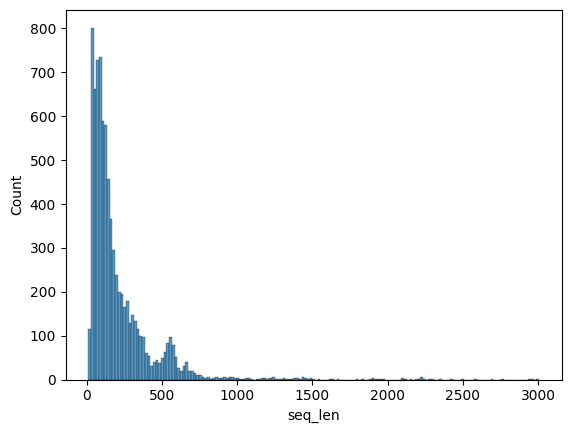

          start          end  count  percentage
0     11.000000   260.666667   6107   75.684719
1    260.666667   510.333333   1227   15.206345
2    510.333333   760.000000    570    7.064072
3    760.000000  1009.666667     60    0.743587
4   1009.666667  1259.333333     31    0.384186
5   1259.333333  1509.000000     31    0.384186
6   1509.000000  1758.666667      5    0.061966
7   1758.666667  2008.333333     11    0.136324
8   2008.333333  2258.000000     14    0.173504
9   2258.000000  2507.666667      5    0.061966
10  2507.666667  2757.333333      3    0.037179
11  2757.333333  3007.000000      5    0.061966


In [3]:
#Take the filtered sequences (<=3036) and make a pie chart showing the distribution of sequence lengths. Not factoring in prevalence
sequence_len = os.path.join(os.getcwd(),"..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5_seq_len_in_99.9percentile.csv")
df = pd.read_csv(sequence_len)
df
print_seq_len_histogram(df, 12)

# Prevalence before filtering (IV and NonIV)

min seq len = 11
max seq len = 7154


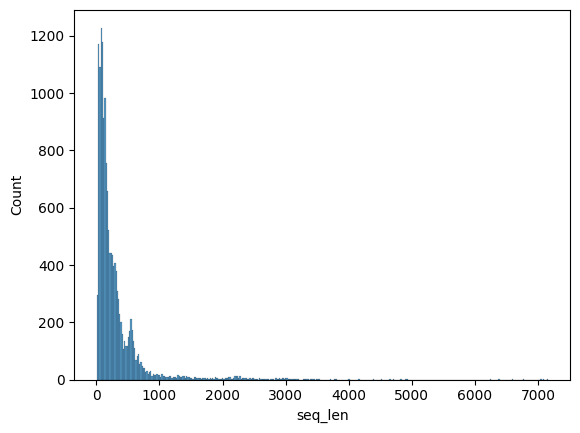

      start      end  count  percentage
0     11.00   606.25  13833   90.541956
1    606.25  1201.50    916    5.995549
2   1201.50  1796.75    210    1.374525
3   1796.75  2392.00    178    1.165074
4   2392.00  2987.25     73    0.477811
5   2987.25  3582.50     46    0.301087
6   3582.50  4177.75      7    0.045818
7   4177.75  4773.00      5    0.032727
8   4773.00  5368.25      3    0.019636
9   5368.25  5963.50      0    0.000000
10  5963.50  6558.75      2    0.013091
11  6558.75  7154.00      5    0.032727


In [4]:
#prevalence before filtering 1%
beforecutoff = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv.csv")
df = pd.read_csv(beforecutoff)
df
print_seq_len_histogram(df, 12)

# Prevalence before filtering (NonIV only)

min seq len = 11
max seq len = 7078


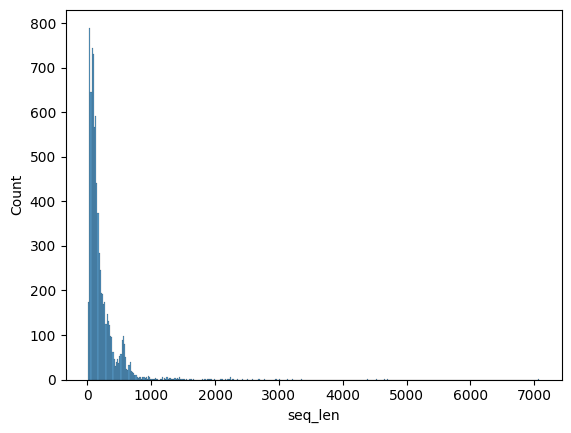

          start          end  count  percentage
0     11.000000   599.916667   7701   95.344806
1    599.916667  1188.833333    283    3.503776
2   1188.833333  1777.750000     47    0.581899
3   1777.750000  2366.666667     28    0.346663
4   2366.666667  2955.583333      8    0.099047
5   2955.583333  3544.500000      5    0.061904
6   3544.500000  4133.416667      0    0.000000
7   4133.416667  4722.333333      4    0.049523
8   4722.333333  5311.250000      0    0.000000
9   5311.250000  5900.166667      0    0.000000
10  5900.166667  6489.083333      0    0.000000
11  6489.083333  7078.000000      1    0.012381


In [5]:
#Prevalence before filtering out 1%
aftercutoff = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv")
df2 = pd.read_csv(aftercutoff)
print_seq_len_histogram(df2, 12)

min seq len = 11
max seq len = 7078


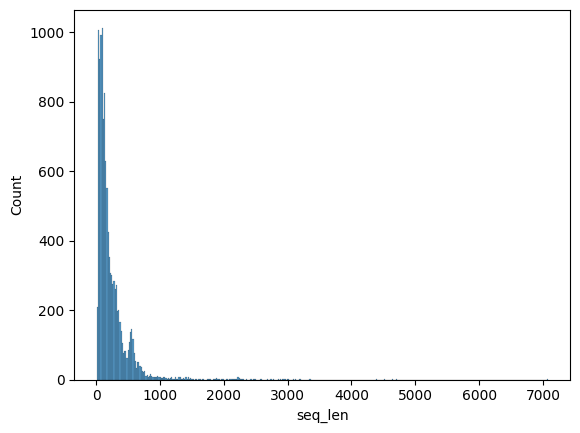

          start          end  count  percentage
0     11.000000   599.916667  11155   94.182709
1    599.916667  1188.833333    517    4.365079
2   1188.833333  1777.750000     83    0.700777
3   1777.750000  2366.666667     53    0.447484
4   2366.666667  2955.583333     20    0.168862
5   2955.583333  3544.500000     11    0.092874
6   3544.500000  4133.416667      0    0.000000
7   4133.416667  4722.333333      4    0.033772
8   4722.333333  5311.250000      0    0.000000
9   5311.250000  5900.166667      0    0.000000
10  5900.166667  6489.083333      0    0.000000
11  6489.083333  7078.000000      1    0.008443


In [6]:
aftercutoff = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_gte_0.05_prcnt_prevalence.csv")
df2 = pd.read_csv(aftercutoff)
print_seq_len_histogram(df2, 12)

In [7]:
#Looking at this, we can see that when we cut off to make sure the prevalence is greater
#than 1%, the sequences get shorter. While they are not directly related, they can be indirectly
#related as the longer sequences are noisy and less common, so we filter tham out in the dataset
#decreased by 76 for max sequence length

# Creating a chart for sequence lengths before filtering out 1% prevalence & including IV

In [8]:
def seq_length_analysis(input_file_path, output_file_path):
    df = pd.read_csv(input_file_path)
    df["seq_len"] = df["seq"].apply(lambda x: len(x))
    print(f"min = {df['seq_len'].min()}")
    print(f"max = {df['seq_len'].max()}")
    plt.clf()
    sns.set_theme()
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.histplot(df["seq_len"].values, bins=400, ax=ax, fill=True, alpha=1, kde=False, color=sns.color_palette("dark")[0])
    sns.rugplot(data=df, x="seq_len", height=-.03, clip_on=False, color="black", alpha=.5)
    ax.set_xlabel("Sequence Length", fontsize=12)
    ax.set_ylabel("Number of sequences", fontsize=12)
    ax.set_xticks(np.arange(0, df["seq_len"].max() + 1, 100))
    ax.set_xticklabels(ax.get_xticklabels(), fontsize= 4)
    ax.set_xlim((0, df["seq_len"].max() + 10))
    plt.savefig(output_file_path, bbox_inches="tight", dpi=600)
    plt.show()
    #in total, there are 8077 sequences and the max sequence length is 7154

min = 11
max = 7154


<Figure size 640x480 with 0 Axes>

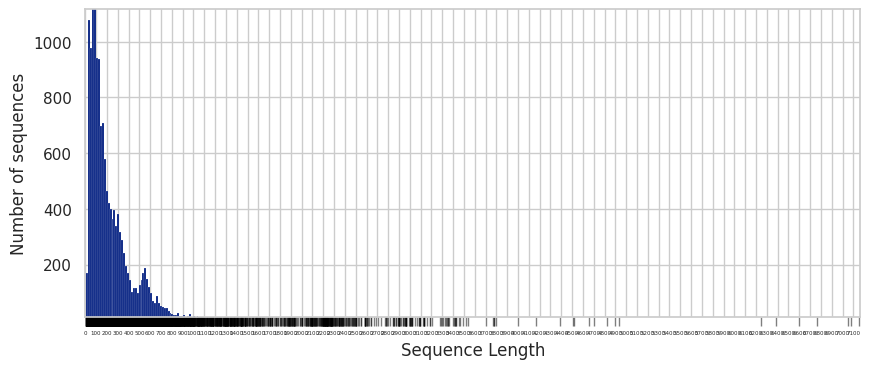

In [9]:
output_pdf = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/seqLen.pdf")
seq_length_analysis(beforecutoff, output_pdf)

In [10]:
import matplotlib.colors as color

def scatter(input_file, output_file):
    df = pd.read_csv(input_file)
    df["seq_len"] = df["seq"].apply(lambda x : len(x)) #creates column of sequence lengths
    print(f"min = {df['seq_len'].min()}")
    print(f"max = {df['seq_len'].max()}")

    # x = df['seq_len']
    # y = df['Count']
    counts = df["seq_len"].value_counts().sort_index() #each row holds sequence length
    #value_counts() is how many times the sequence length appears (count, y axis)
    #sort_index sorts by the sequence length (x axis)
    
    x = counts.index  # unique sequence lengths
    y = counts.values  # count of each length

   
    sns.set_theme()
    sns.set_style("whitegrid")

    #fig, ax = plt.subplots(figsize = (10,4))
    plt.figure(figsize = (9,5))
    plt.scatter(x, y, color = 'darkblue', alpha = 0.7)
    plt.xlabel("Sequence Length", fontsize = 12)
    plt.ylabel("Number of sequences", fontsize = 12)
    plt.title("Sequence Lengths Scatter with all Prevalences")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show() #maybe create a density plot

min = 11
max = 7154


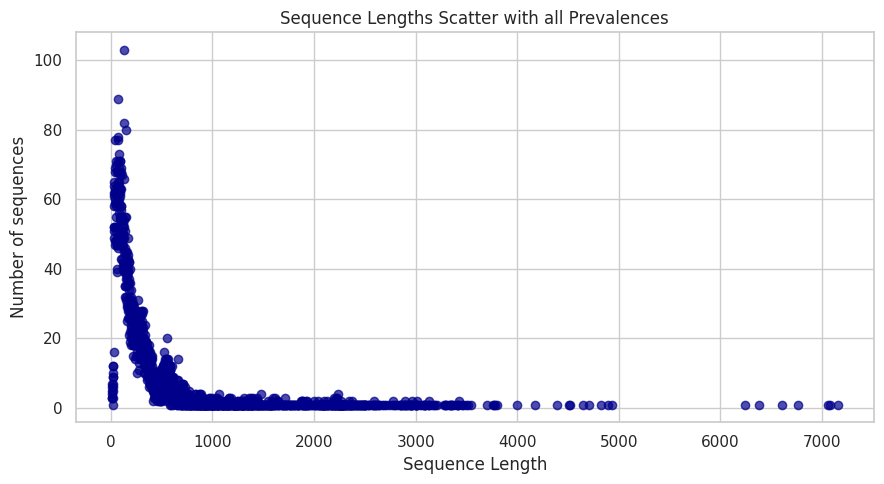

In [11]:
output_pdf = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/seqLen.pdf")
scatter(beforecutoff, output_pdf)

# Chart after filtering out IV

min = 11
max = 7078


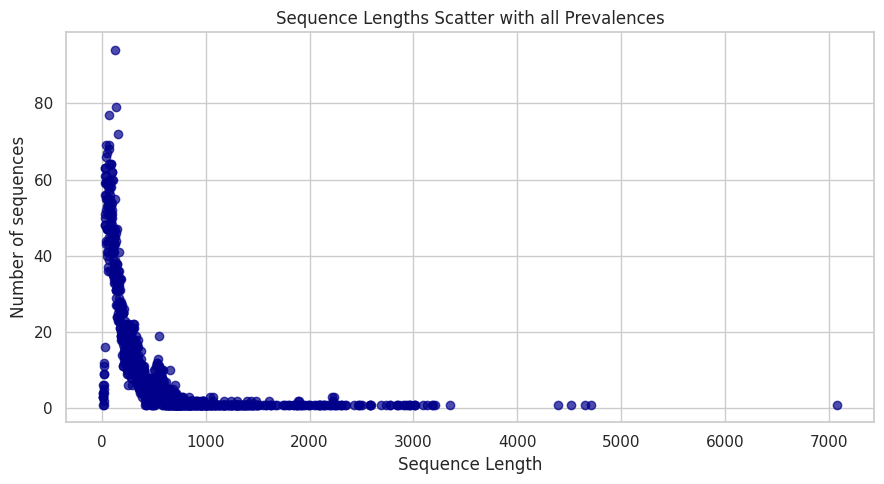

In [12]:
scatter(aftercutoff, output_pdf)
#As you can see, the maximum sequence length went down so the graph got smaller as well, making the data cleaner. 

# Chart with prevalence > 1% & sequence length <= 3036

min = 11
max = 3007


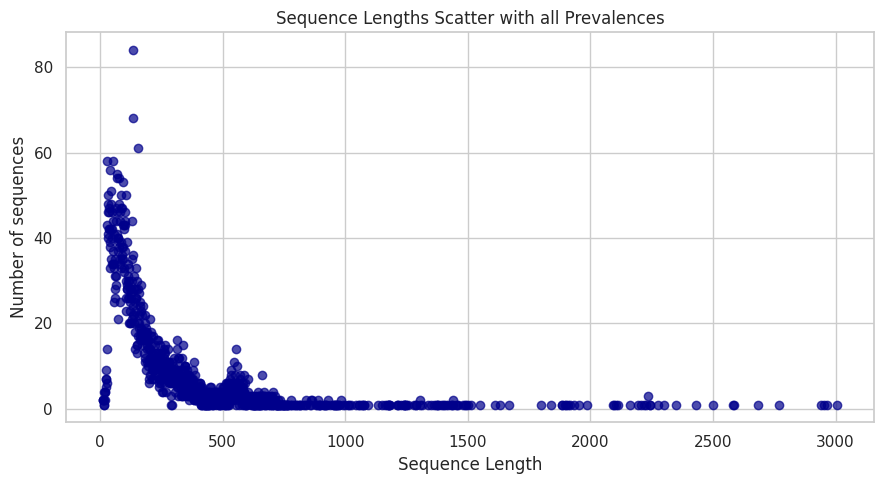

In [13]:
filtered = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5_seq_len_in_99.9percentile.csv")
scatter(filtered, output_pdf)


#The number of sequences clutters more down near 20-60, unlike the above one, and the sequence length gets cut off by over half

# First and Third charts Density Plot

In [14]:
def density(input1, input2, output):

    df1 = pd.read_csv(input1)
    df2 = pd.read_csv(input2)
    df1["seq_len"] = df1["seq"].apply(lambda x : len(x)) #creates column of sequence lengths
    df2["seq_len"] = df2["seq"].apply(lambda x : len(x)) #creates column of sequence lengths
    
    print(f"min = {df['seq_len'].min()}")
    print(f"max = {df['seq_len'].max()}")

    sns.set_theme()
    sns.set_style("whitegrid")
    plt.figure(figsize = (9,5))

    sns.displot(df1['seq_len'], bins = 100, color = "darkblue", kde= True, alpha = 0.6, label = "Dataset 1")
    sns.displot(df2['seq_len'], bins = 100, color = "darkred", kde = True, alpha = 0.6, label = "Dataset 2")
    
    plt.xlabel("Sequence Length", fontsize = 12)
    plt.ylabel("Number of sequences", fontsize = 12)
    plt.title("Sequence Lengths Scatter")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output)
    plt.show() #maybe create a density plot
    

min = 11
max = 7154


<Figure size 900x500 with 0 Axes>

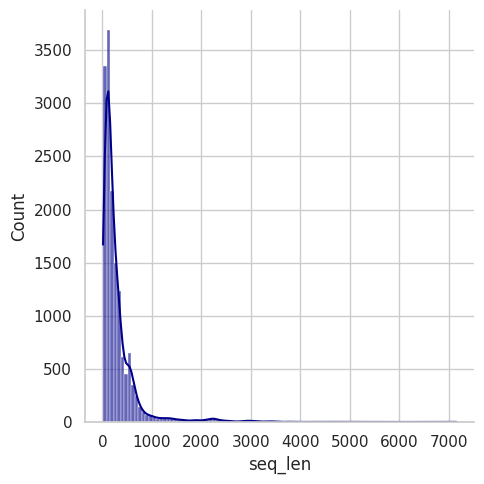

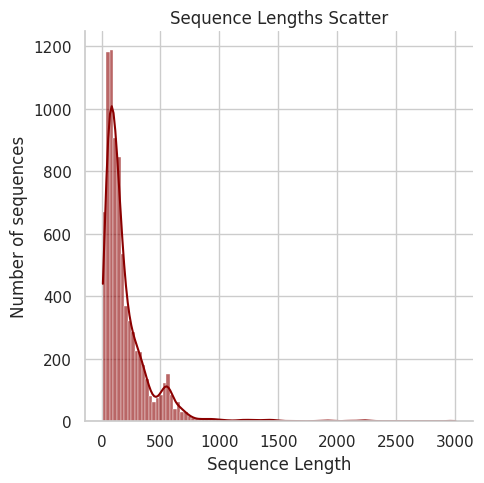

In [15]:
output = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/seqDensity.pdf")
density(beforecutoff, filtered, output) 

In [16]:
def histplot(input1, input2, output):

    df1 = pd.read_csv(input1)
    df2 = pd.read_csv(input2)
    df1["seq_len"] = df1["seq"].apply(lambda x : len(x)) #creates column of sequence lengths
    df2["seq_len"] = df2["seq"].apply(lambda x : len(x)) #creates column of sequence lengths
    
    print(f"min = {df['seq_len'].min()}")
    print(f"max = {df['seq_len'].max()}")

    sns.set_theme()
    sns.set_style("whitegrid")
    plt.figure(figsize = (9,5))
    bin_range = (0, 7200)
    
    sns.histplot(df1['seq_len'].values, bins = 70, color = "darkblue", kde= True, alpha = 0.6, label = "Unfiltered Dataset", binrange=bin_range)
    sns.histplot(df2['seq_len'].values, bins = 70, color = "darkred", kde = True, alpha = 0.6, label = "Filtered Dataset", binrange = bin_range)
    
    plt.xlim(0,7000)
    plt.legend()
    plt.xlabel("Sequence Length", fontsize = 12)
    plt.ylabel("Number of sequences", fontsize = 12)
    plt.title("All Prevalences vs. Filtered")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output)
    plt.show()
    

min = 11
max = 7154


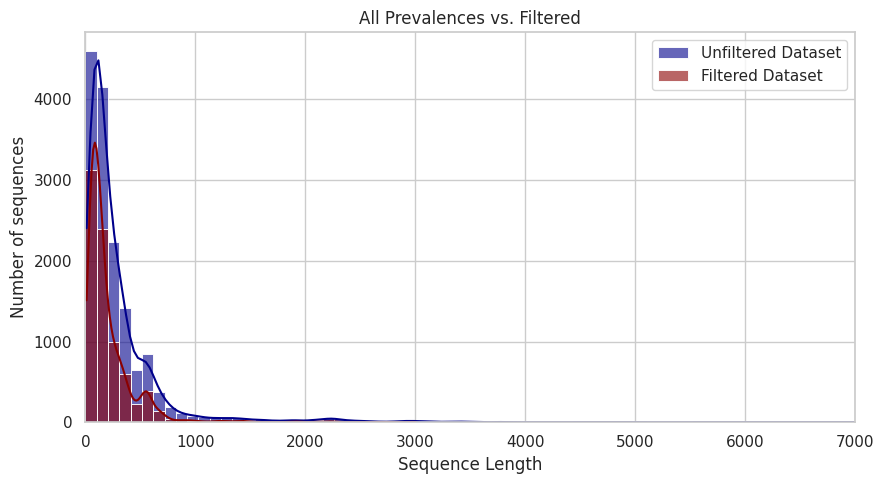

In [17]:
output = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/seqDensity.pdf")
histplot(beforecutoff, filtered, output)

# Findings